# Car Price Prediction

* Hui-Lin Sun

* Course:** CISB 60 – ML and DL (Fall, 2024)

### To see my project on GitHub:

### Problem Statement
* This project aims to explore the relationship between a car's engine cylinders (engine_cylinders) and its manufacturer suggested retail price (MSRP) using linear regression. By leveraging a dataset of car attributes, the project identifies how variations in cylinders influence the price of a vehicle.
        
    
* **Keywords:** car price prediction, Linear Regression, Engine Cylinders, MSRP, Tuning Hyperparameters, EDA,
Machine Learning, Deeping Learning,Feature Selection, Model Evaluation, Mean Squared Error


### Required packages

1. Data Processing:
- numpy and pandas: For handling numerical data and dataframes.
- scipy.stats.zscore: For normalizing data using Z-scores.

2. Data Visualization:
- seaborn and matplotlib.pyplot: For creating various types of visualizations.

3. Machine Learning:
- train_test_split: For splitting datasets into training and testing sets.
- LinearRegression: For implementing linear regression models.
- metrics: For evaluating model performance (e.g., MSE, R-squared).
- LabelEncoder: For encoding categorical labels into numerical values.
- MinMaxScaler: For scaling data into a specific range (typically 0-1).

4. Deep Learning:
- tensorflow.keras: For building and training deep learning models.
- Sequential, Dense, Input: For defining neural network architectures.

5. Tuning Hyperparameters:
- keras-tuner: For hyperparameter tuning in deep learning models.

### Methodology

Introduce the project
* Model 1
    * Linear Regression
    * The linear regression model is a statistical approach to modeling the relationship between a dependent variable **msrp** and an independent variable **engine_cylinders**. It assumes a linear relationship and uses the ordinary least squares method to minimize the difference between the predicted and actual values.
    

 * Model 2
    * Deep Learning Linear Regression
    * The deep learning model uses a neural network with multiple layers to predict the msrp based on engine_cylinders. Unlike traditional linear regression, this approach can capture complex, non-linear relationships between variables. The model consists of hidden layers with activation functions, enabling it to learn intricate patterns in the data.
    
    
 * Model 3
    * RandomSearch tuner
    * The factor determines how the number of models trained is adjusted during each iteration of the training  
      loop. EarlyStopping helps prevent overfitting by stopping the training when a specified metric (like loss)  
      stops improving.The loss is monitored and use 3 for the specified number of epochs,is set to true,terminating
      the training process.

# EDA

In [1]:
# data processing
import numpy as np
import pandas as pd

#Viz
import seaborn as sns
import matplotlib.pyplot as plt

#zscore
from scipy.stats import zscore

#scikit-learn library for LabelEncoder Model, train_test_spli,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#tensorflow.keras for Deep Learning
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

#keras library for Tuning Hyperparameters
!pip install keras-tuner
import keras_tuner
import keras
import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load the data
car_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/car_data.csv')
car_df.head(15)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


### Replace the empty spaces in the column names with an underscore

In [4]:
car_df .columns = car_df .columns.str.lower().str.replace(' ', '_')

string_columns = list(car_df .dtypes[car_df .dtypes == 'object'].index)

for col in string_columns:
    car_df [col] = car_df [col].str.lower().str.replace(' ', '_')

car_df .head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [5]:
#it gives you hints of type of objects in the data frame
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
#look for missing values in df all the columns
car_df .isna().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


In [7]:
car_df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Data Visualization

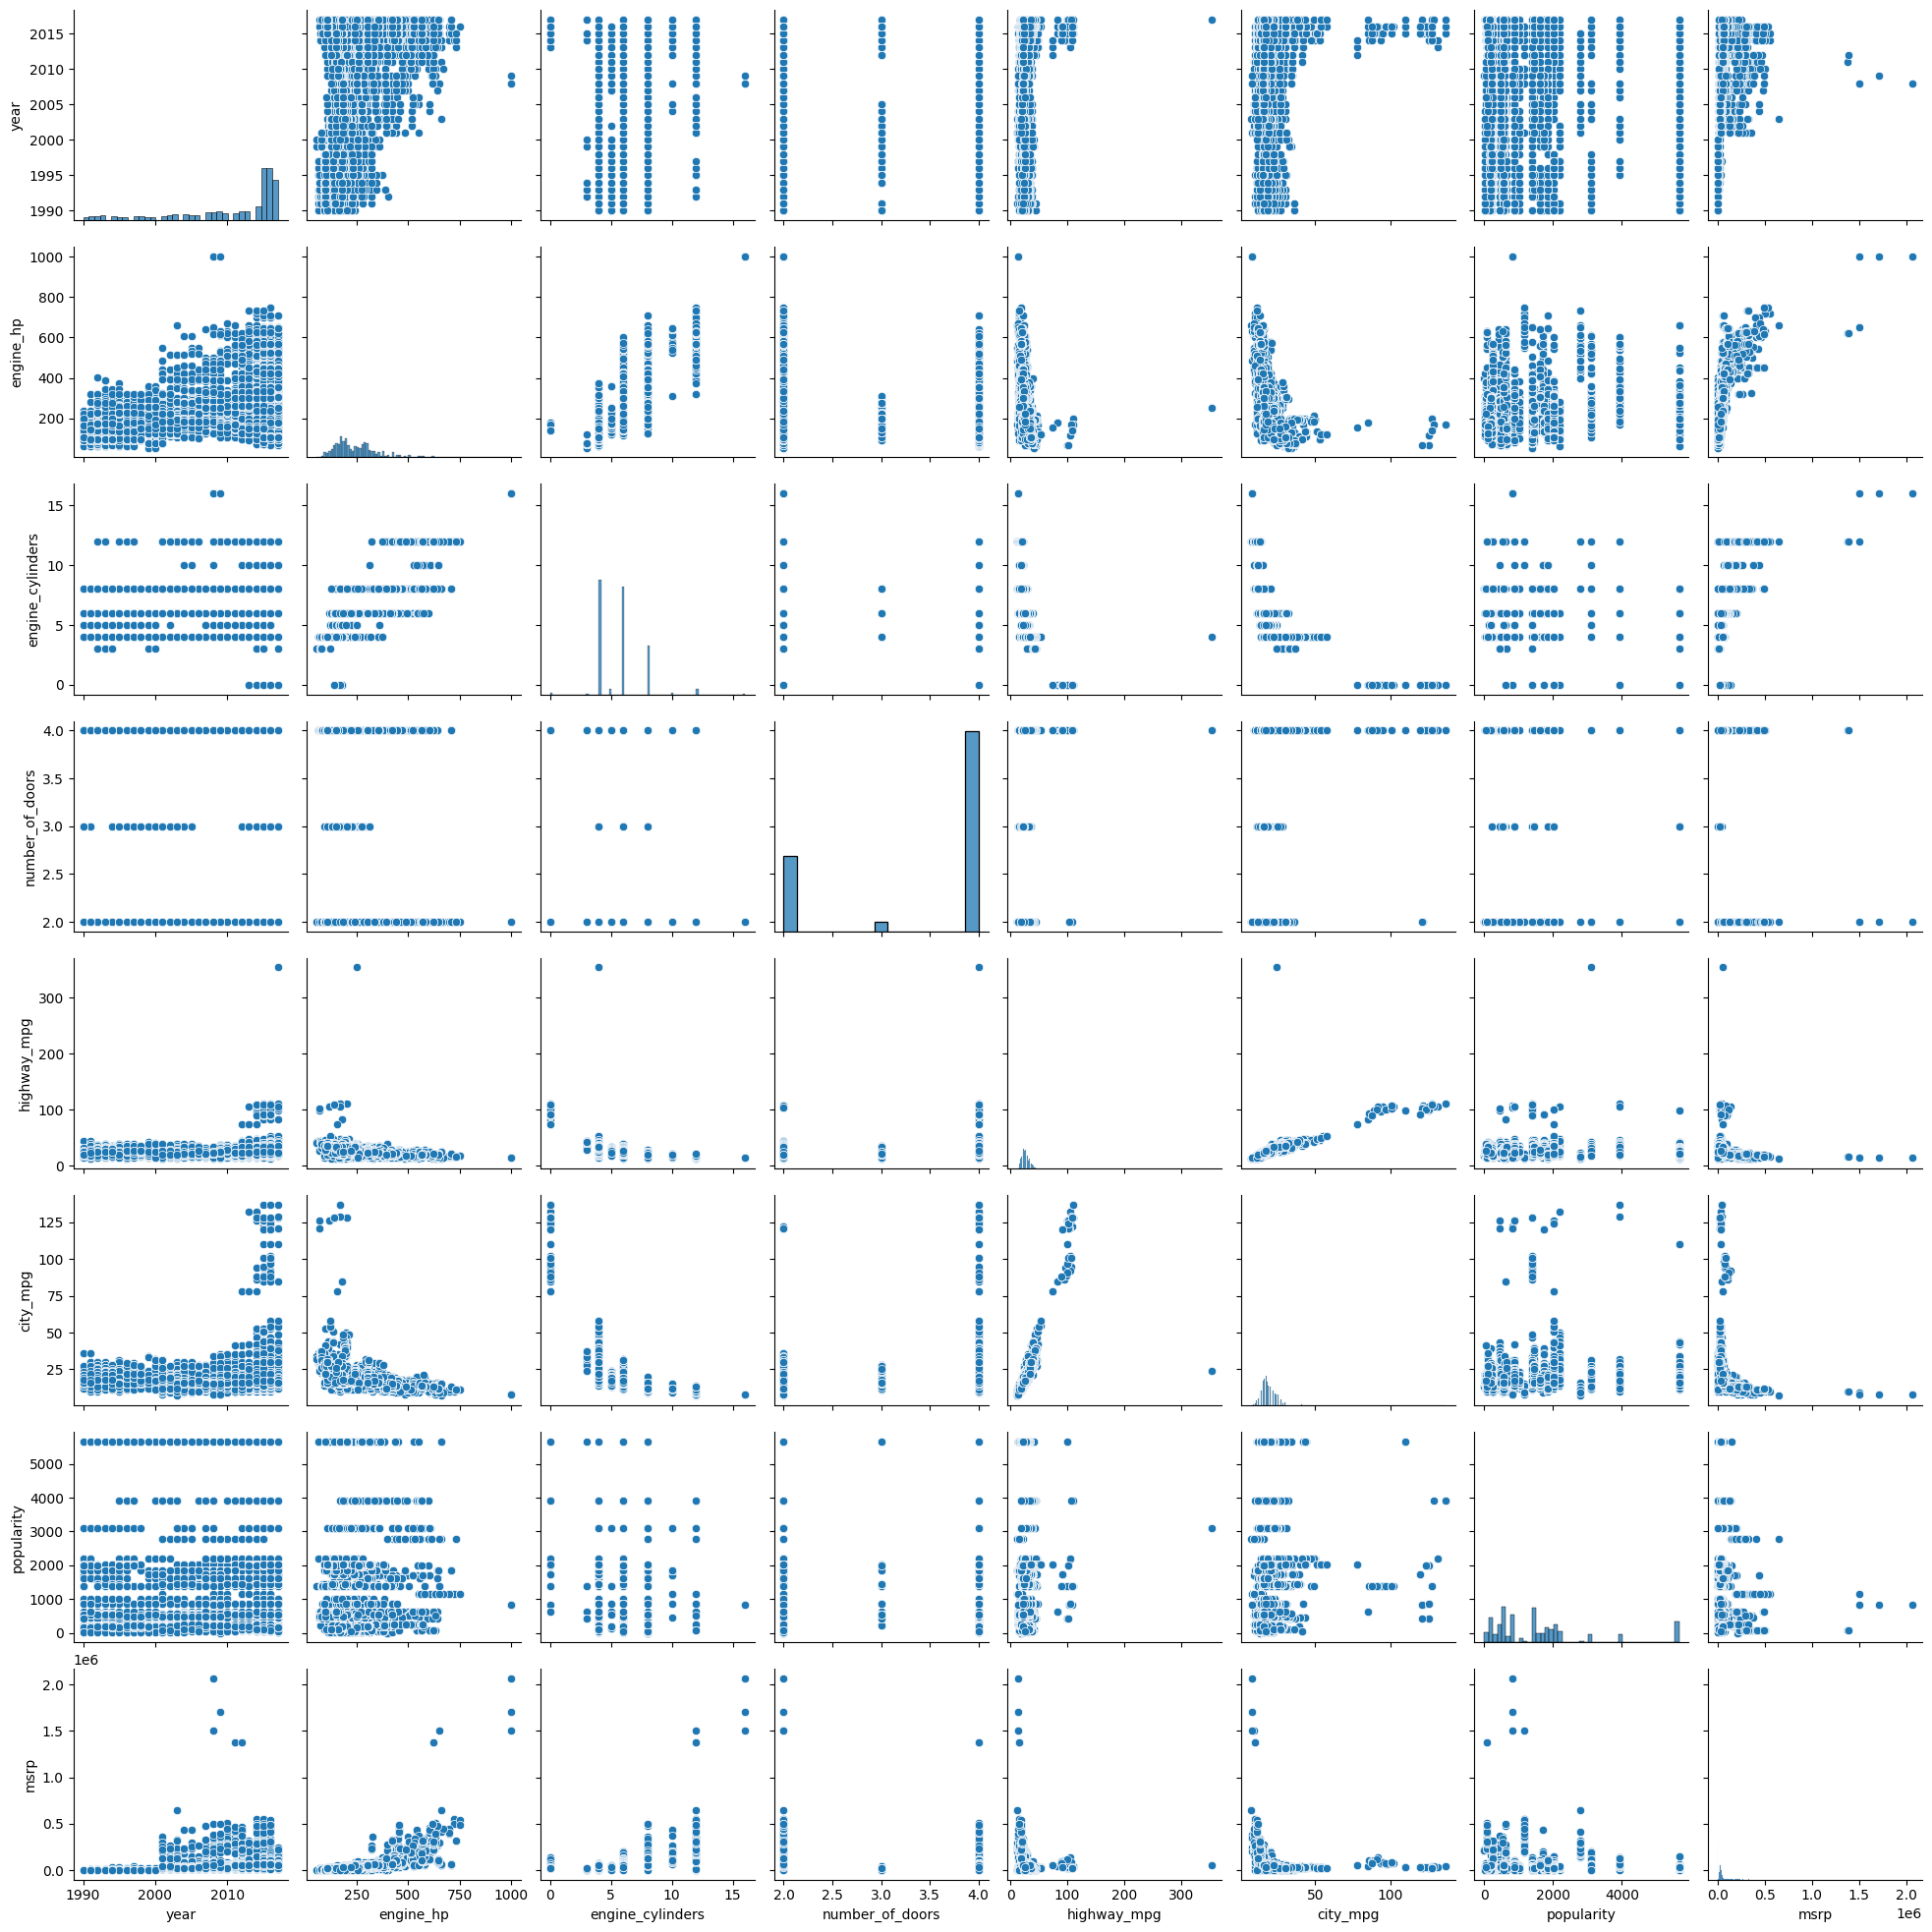

In [8]:
sns.pairplot(car_df)

### Calculate the correlation matrix and Plot the heatmap

In [9]:
# List of columns that need to be label encoded
columns_to_encode = ['vehicle_style', 'make', 'model', 'engine_fuel_type',
    'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each column in the list
for column in columns_to_encode:
    car_df[column] = label_encoder.fit_transform(car_df[column])

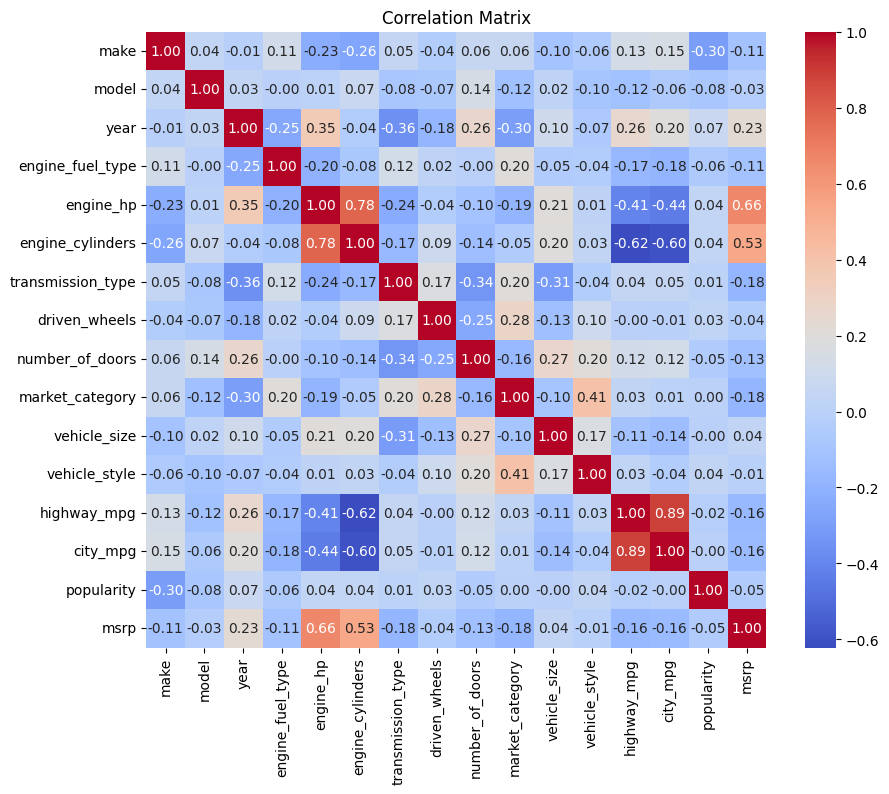

In [10]:
# Calculate the correlation matrix
corr_matrix = car_df.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
print("Pearson Correlation Matrix:")
print(corr_matrix)

Pearson Correlation Matrix:
                       make     model      year  engine_fuel_type  engine_hp  \
make               1.000000  0.042085 -0.014180          0.113955  -0.226750   
model              0.042085  1.000000  0.034052         -0.002821   0.009244   
year              -0.014180  0.034052  1.000000         -0.254002   0.351794   
engine_fuel_type   0.113955 -0.002821 -0.254002          1.000000  -0.204224   
engine_hp         -0.226750  0.009244  0.351794         -0.204224   1.000000   
engine_cylinders  -0.264106  0.070498 -0.041479         -0.076528   0.779988   
transmission_type  0.045046 -0.081596 -0.361553          0.123393  -0.238360   
driven_wheels     -0.035336 -0.072515 -0.183914          0.019074  -0.035227   
number_of_doors    0.057315  0.138723  0.263787         -0.003671  -0.102713   
market_category    0.057038 -0.123702 -0.298355          0.204286  -0.185534   
vehicle_size      -0.102412  0.024458  0.102098         -0.048840   0.208144   
vehicle_styl

### Explain the output for Pearson Correlation Matrix

1. Highly Positive Correlated Features:
- Highway MPG and City MPG:0.886829
  The vehicles with better highway MPG generally also perform well in city MPG.
- Engine HP and Engine Cylinders:0.779988
  It means that vehicles with higher engine horsepower tend to have more engine cylinders.
  
2. Highly Negative Correlated Features:
- Highway MPG and Engine Cylinders: -0.621606.
  It means as the number of engine cylinders increases, highway MPG tends to decrease.

- City MPG and Engine Cylinders:-0.600776
  Similar to highway MPG, there is a negative correlation between city MPG and engine cylinders.
  
3. Features with Moderate Correlation:
- MSRP and Engine HP: 0.662008
  The vehicles with more horsepower tend to have higher MSRP.
- MSRP and Engine Cylinders: 0.531312
  It is a positive relationship between the number of engine cylinders and the MSRP.

In [12]:
#sns.pairplot(car_df)

# Machine Learning

In [13]:
# Select relevant columns
df_re= car_df[['engine_cylinders', 'msrp']]

# Drop rows with missing values
df_re1 = df_re.dropna()
df_re1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11884 entries, 0 to 11913
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_cylinders  11884 non-null  float64
 1   msrp              11884 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 278.5 KB


In [14]:
#Calculate zscore
import numpy as np
from scipy import stats

# Assuming df is your DataFrame and 'engine_cylinders' is the column you're working with
df_re1['engine_cylinders_zscore'] = np.abs(stats.zscore(df_re1['engine_cylinders'].dropna()))
df_re1['engine_cylinders_outlier'] = df_re1['engine_cylinders_zscore'] > 3

# Print the rows with outliers
print("\nOutliers Detected with Z-score:")
print(df_re1[df_re1['engine_cylinders_outlier']])


Outliers Detected with Z-score:
       engine_cylinders    msrp  engine_cylinders_zscore  \
460                12.0  223970                 3.578336   
461                12.0  219775                 3.578336   
462                12.0  228625                 3.578336   
463                12.0  224585                 3.578336   
464                12.0  228625                 3.578336   
...                 ...     ...                      ...   
11394              12.0  208295                 3.578336   
11395              12.0  223295                 3.578336   
11448              12.0  284900                 3.578336   
11449              12.0  294025                 3.578336   
11450              12.0  304350                 3.578336   

       engine_cylinders_outlier  
460                        True  
461                        True  
462                        True  
463                        True  
464                        True  
...                         ...  
11394   

<ipython-input-14-2ef3b338b882>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re1['engine_cylinders_zscore'] = np.abs(stats.zscore(df_re1['engine_cylinders'].dropna()))
<ipython-input-14-2ef3b338b882>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re1['engine_cylinders_outlier'] = df_re1['engine_cylinders_zscore'] > 3


In [15]:
#remove outliers
df= df_re1[df_re1['engine_cylinders_outlier'] == False]
df.drop(df[df['engine_cylinders_outlier'] == True].index, inplace=True)

<ipython-input-15-f9e166fce0ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['engine_cylinders_outlier'] == True].index, inplace=True)


Mean Squared Error: 937558797.7396808
R-squared: 0.2037189020770992


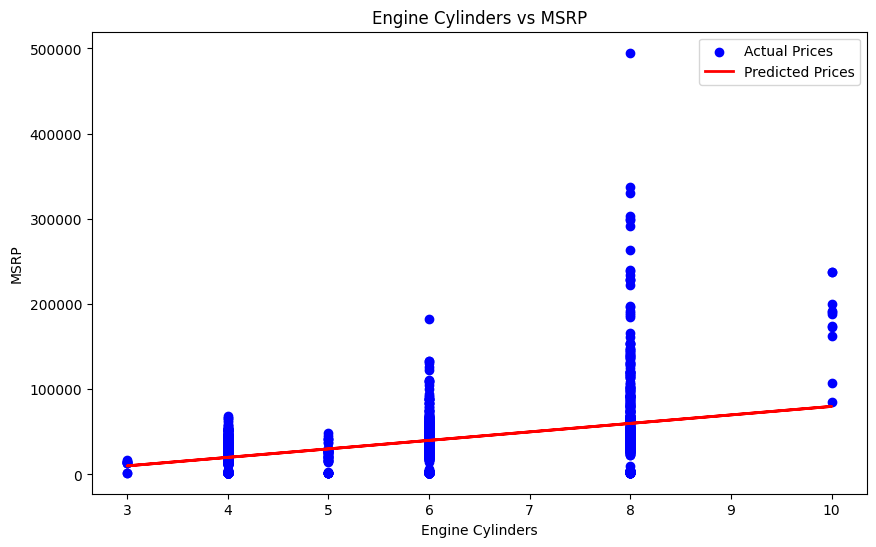

In [16]:
# Define features (X) and target (y)
X = df[['engine_cylinders']]  # Predictor
y = df['msrp']         # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Engine Cylinders vs MSRP')
plt.xlabel('Engine Cylinders')
plt.ylabel('MSRP')
plt.legend()
plt.show()

### Explain the output

1. Explain the plot:
  - The relationship between Engine Cylinders HP and MSRP is Weak Linear Relationship.This indicates that the
    number of engine   cylinders has a minimal effect on MSRP in the dataset.
  - The regression model seems to have a poor fit, with the predicted prices not closely matching the actual data
    points.
  - Outliers do not follow the general trend.
  

2. Mean Squared Error (937558797.7396808) is quite large, on average, the model's predictions are significantly off
   from the actual values.
   

3. Value of the R-squared(0.2037189020770992) is quite low and means the model doesn't fit the data very well.


# Deep Learning

Applying:
- Normalization: Normalize engine_hp and msrp values using MinMaxScaler to improve model performance.
- Model Definition: Create a neural network model with two hidden layers using Keras.
- Compilation: Use the Adam optimizer and Mean Squared Error (MSE) loss for regression.
- Training: Train the model for 100 epochs with a batch size of 32.
- Evaluation: Assess the model using Mean Absolute Error (MAE).
- Prediction and Visualization: Rescale predictions to the original range and visualize the results against actual values.

In [17]:
#from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras import Input

In [18]:
# Select relevant columns
df = car_df[['engine_cylinders', 'msrp']]

# Drop rows with missing values
df = df.dropna()

# Define features (X) and target (y)
X = df[['engine_cylinders']].values  # Predictor
y = df['msrp'].values.reshape(-1, 1)  # Target

# Normalize the data (Deep Learning works better with normalized data)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Deep Learning model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly define the input shape
    Dense(32, activation='relu'),     # Hidden layer with 32 neurons
    Dense(16, activation='relu'),     # Hidden layer with 16 neurons
    Dense(1)                          # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

# Make predictions
y_pred = model.predict(X_test)

# Rescale the predictions and test targets back to original scale
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(y_pred)



Epoch 1/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.0932e-04 - mae: 0.0118 - val_loss: 6.8189e-04 - val_mae: 0.0114
Epoch 2/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.2901e-04 - mae: 0.0128 - val_loss: 6.0182e-04 - val_mae: 0.0098
Epoch 3/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6667e-04 - mae: 0.0091 - val_loss: 5.6112e-04 - val_mae: 0.0098
Epoch 4/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2696e-04 - mae: 0.0098 - val_loss: 5.4053e-04 - val_mae: 0.0098
Epoch 5/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8692e-04 - mae: 0.0096 - val_loss: 5.3851e-04 - val_mae: 0.0097
Epoch 6/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6586e-04 - mae: 0.0097 - val_loss: 5.5544e-04 - val_mae: 0.0097
Epoch 7/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6299e-04 - mae: 0.0090 - val_loss: 5.4310e-04 - val_mae: 0.0101
Epoch 8/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1252e-04 - mae: 0.0098 - val_loss: 5.7646e-04 - 

#### Visualize the results

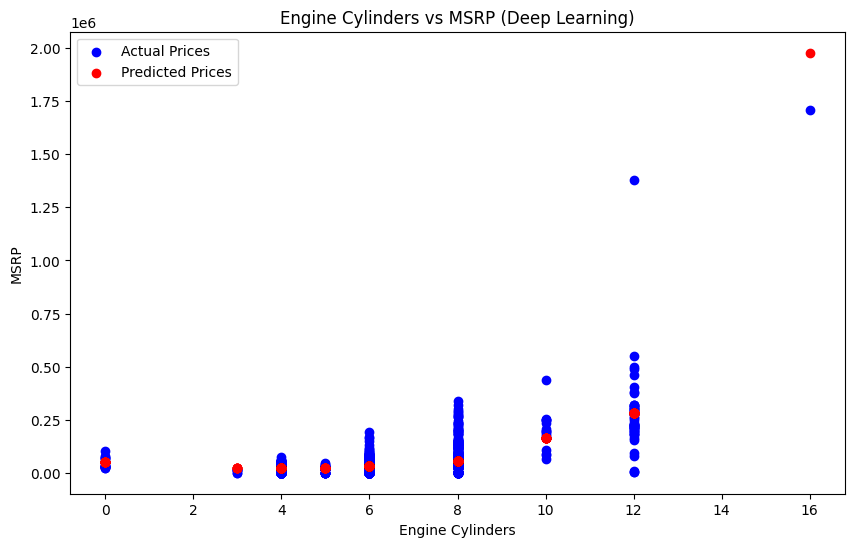

In [19]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(scaler_X.inverse_transform(X_test), y_test_original, color='blue', label='Actual Prices')
plt.scatter(scaler_X.inverse_transform(X_test), y_pred_original, color='red', label='Predicted Prices')
plt.title('Engine Cylinders vs MSRP (Deep Learning)')
plt.xlabel('Engine Cylinders')
plt.ylabel('MSRP')
plt.legend()
plt.show()

### Explain the output

1. Improved Fit:
  - Compared to the previous plot using a simpler model, the red points (predicted prices) in this plot seem much
    closer to the blue points (actual prices), indicating that the deep learning model is performing better and
    capturing the trend more accurately.

2. Predicted Prices:
  - The deep learning model's predictions (represented by the red dots) are noticeably closer to the actual prices,
    especially for the points that were outliers in the previous plot. This suggests that deep learning has managed
    to capture more complex patterns or relationships in the data.

3. Outliers:
  - There are still some outliers, especially at the high MSRP values. However, the model does a better job of   
    predicting MSRP values that were previously inaccurate with simpler models.

4. Conclusion:
  - The deep learning model seems to provide a better fit for the Engine Cylinders to MSRP relationship than  
    simpler   models. However, further feature engineering and tuning might still be necessary to handle outliers  
    effectively and improve the model's performance even more.

# Hyperparameter Tuning

In [20]:
import os
import shutil

# shutil module is part of the Python standard library and provides a
# collection of utility functions for working with files and directories.

folder_path = "my_dir"

# Check if the folder exists before attempting to delete it
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'my_dir' does not exist.


### create model

In [21]:
# create model
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))

  # Change the output layer to have 1 unit and a linear activation
  model.add(keras.layers.Dense(1, activation='linear'))

  model.compile(metrics=['mae'], optimizer='Adam', loss='mse')
  return model

In [22]:
os.makedirs("my_dir\introtokit", exist_ok=True)

In [23]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=5,
    directory="my_dir",
    project_name="introtokit"# Specify a valid directory
)


### EarlyStopping in Training

In [24]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [25]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}.
""")

Trial 3 Complete [00h 00m 11s]
val_mae: 0.009887820109724998

Best val_mae So Far: 0.00983548816293478
Total elapsed time: 00h 00m 29s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 16.



### Train the model
 - Find the optimal number of epochs to train the model with the hyperparameters obtained from the search.

In [26]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50,validation_split=0.2)

val_acc_per_epoch = history.history['val_mae']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.2015e-04 - mae: 0.0124 - val_loss: 0.0011 - val_mae: 0.0110
Epoch 2/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0702e-04 - mae: 0.0097 - val_loss: 0.0010 - val_mae: 0.0100
Epoch 3/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3397e-04 - mae: 0.0093 - val_loss: 9.4910e-04 - val_mae: 0.0101
Epoch 4/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5458e-04 - mae: 0.0091 - val_loss: 9.1476e-04 - val_mae: 0.0117
Epoch 5/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4688e-04 - mae: 0.0089 - val_loss: 9.2381e-04 - val_mae: 0.0102
Epoch 6/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5854e-04 - mae: 0.0089 - val_loss: 8.9117e-04 - val_mae: 0.0101
Epoch 7/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4026e-04 - mae: 0.0087 - val_loss: 8.8384e-04 - val_mae: 0.0118
Epoch 8/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6288e-04 - mae: 0.0098 - val_loss: 8.6888e-04 - val_mae: 0.0109


### Re-instantiate the hypermodel and t|rain it with the optimal number of epochs from above.

In [27]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch , validation_split=0.2)

Epoch 1/7
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.1799e-04 - mae: 0.0118 - val_loss: 0.0011 - val_mae: 0.0136
Epoch 2/7
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8649e-04 - mae: 0.0105 - val_loss: 9.6553e-04 - val_mae: 0.0106
Epoch 3/7
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7359e-04 - mae: 0.0091 - val_loss: 9.0323e-04 - val_mae: 0.0109
Epoch 4/7
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5371e-04 - mae: 0.0090 - val_loss: 8.8502e-04 - val_mae: 0.0100
Epoch 5/7
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8224e-04 - mae: 0.0090 - val_loss: 8.7298e-04 - val_mae: 0.0103
Epoch 6/7
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8117e-04 - mae: 0.0093 - val_loss: 9.4955e-04 - val_mae: 0.0101
Epoch 7/7
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3414e-04 - mae: 0.0088 - val_loss: 9.6673e-04 - val_mae: 0.0106


### Evaluate the hypermodel on the test data.

In [28]:
eval_result = hypermodel.evaluate(X_train, y_train)
print("[test loss, test accuracy]:", eval_result)

298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0105e-04 - mae: 0.0093
[test loss, test accuracy]: [0.0004202714189887047, 0.009489099495112896]


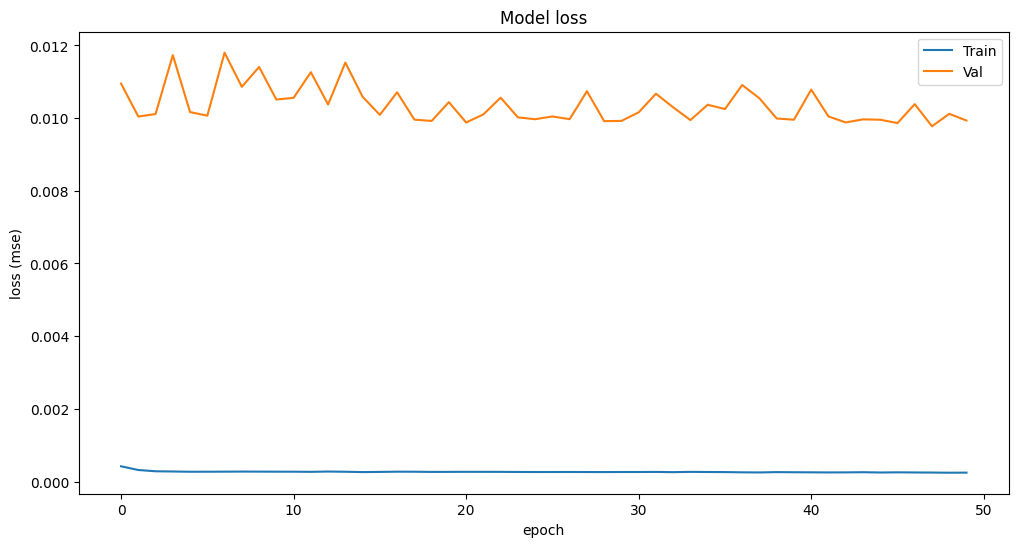

In [29]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_mae'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

In [30]:
from sklearn.metrics import mean_absolute_error

# Let's check how much we are off on average
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

y_pred[0:5]

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.01656548],
       [0.01105275],
       [0.01247349],
       [0.01656548],
       [0.01105275]], dtype=float32)

In [31]:
mae

0.00965689443339949

In [32]:
y_pred[42]

array([0.01105275], dtype=float32)

In [33]:
model.predict(np.reshape(X_test[42], [1, 1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.01105275]], dtype=float32)

# Conclusion

1. This plot illustrates the loss over epochs for both training and validation data, highlighting a more
   significant divergence between the two:
   
  - Training Loss (blue curve):
    The training loss remains consistently low and stable, indicating the model is fitting the training data  
    effectively.
  - Validation Loss (orange curve):
    The validation loss is considerably higher and more fluctuating compared to the training loss.It does not show
    substantial improvement and remains relatively flat with some oscillations, suggesting that the model has
    difficulty generalizing to unseen data.
    
   
2. The substantial gap between training and validation loss is a strong indicator of overfitting. This could be due    to an overly complex model or insufficient, non-representative training data.
   The fluctuations in validation loss may also point to issues such as noise in the validation dataset or   
   insufficient regularization.


3. In the future, further improvement of the model can be used with use of techniquies like regularization, data   
   augmentation, and cross validation.

###  References

- Class Example:
    1. Example 1 - Car Price Predictions
    2. WC 10 - Tuning Hyperparameters - diabetes

### Credits

- Class Example:
    1. Example 1 - Car Price Predictions
    2. WC 10 - Tuning Hyperparameters - diabetes

# End of Project